In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

df = pd.concat(map(lambda csv_file: pd.read_csv(csv_file, index_col=None, header=None, names=[
               "block number", "timestamp", "contract address", "from", "to", "value"]), Path(r'./').rglob('*.csv')), axis=0, ignore_index=True)

df['datetime'] = pd.to_datetime(df['timestamp'])

df.sort_values(["timestamp", "from", "value"], inplace=True)
df.head()

,block number,timestamp,contract address,from,to,value,datetime
1214083,7605604,2019-04-20T16:34:12.000Z,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0x0000000000000000000000000000000000000000,0x78655080b65f42e2cee5fa5673689cc44d4e1cfc,1.000000e+10,2019-04-20 16:34:12+00:00
1214084,7605793,2019-04-20T17:22:02.000Z,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0x78655080b65f42e2cee5fa5673689cc44d4e1cfc,0xcbfe11b78c2e6cb25c6eda2c6ff46cd4755c8fca,1.000000e+10,2019-04-20 17:22:02+00:00
1214085,7605866,2019-04-20T17:36:02.000Z,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0xcbfe11b78c2e6cb25c6eda2c6ff46cd4755c8fca,0xb316fa9fa91700d7084d377bfdc81eb9f232f5ff,3.230086e+09,2019-04-20 17:36:02+00:00
1214086,7622973,2019-04-23T09:27:06.000Z,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0xb316fa9fa91700d7084d377bfdc81eb9f232f5ff,0x2a39f6e325055f6a8b90ee42ad007dcaac56368b,1.900000e+09,2019-04-23 09:27:06+00:00
1214087,7628252,2019-04-24T05:13:43.000Z,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,0xb316fa9fa91700d7084d377bfdc81eb9f232f5ff,0x50d669f43b484166680ecc3670e4766cdb0945ce,1.000000e+00,2019-04-24 05:13:43+00:00


In [7]:
sumDf = df.groupby(df.datetime.dt.date)['value'].sum()
sumDf.head()

datetime
2019-04-20    2.323009e+10
2019-04-23    1.900000e+09
2019-04-24    8.666667e+08
2019-04-25    4.391146e+08
2019-04-26    4.239496e+09
Name: value, dtype: float64

In [31]:
sumDf.max()

23230085552.0

<Figure size 2000x300 with 0 Axes>

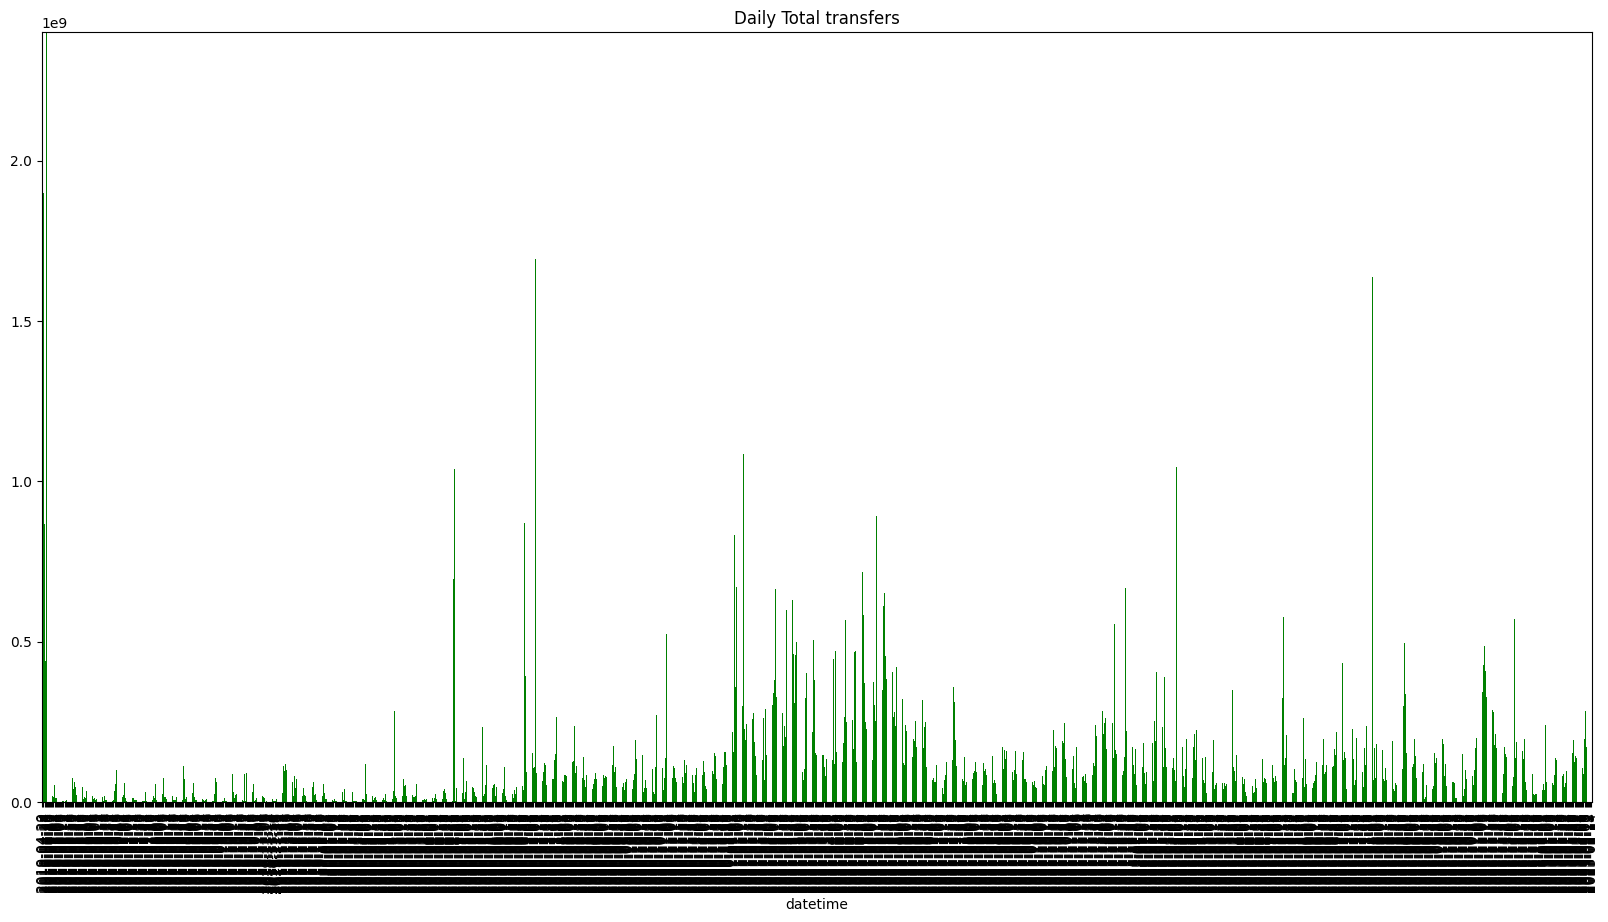

In [36]:
plt.figure().set_figwidth(20)
plt.figure().set_figheight(10)
sumDf.plot(kind = 'bar',
        x = 0,
        y = 1,
        color = 'green',
        title='Daily Total transfers',
        ylim=(0,2400000000)
        )

# show the plot
plt.show()